<a href="https://colab.research.google.com/github/MillenRodrigues/VizualizacaoDeDados/blob/main/Trilha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


Millen Tavares Rodrigues

Tia: 92300073
Disponível em [github](https://github.com/MillenRodrigues/VizualizacaoDeDados/blob/main/Trilha4.ipynb)

Leitura do arquivo do Kaggle

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Análise exploratória

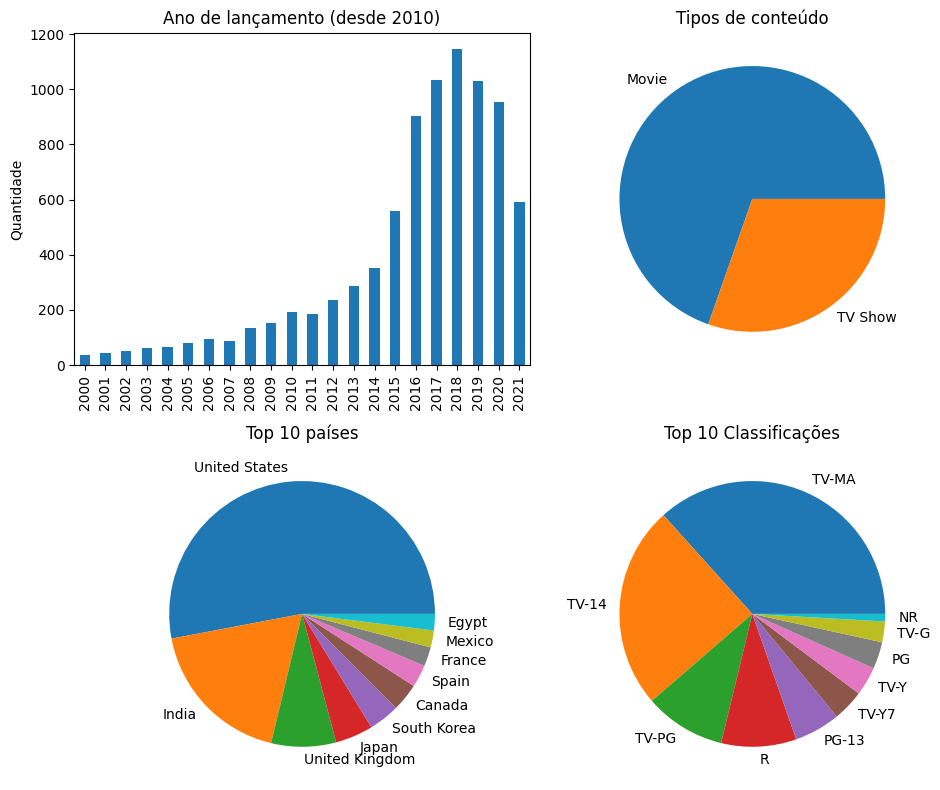

In [6]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))


# lançamento por anos desde 2020
df_release_year_since_2000 = df[df['release_year'] >= 2000]
df_release_year_since_2000['release_year'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Ano de lançamento (desde 2010)')
axes[0, 0].set_ylabel('Quantidade')


# Plot a pie chart of type
df['type'].value_counts().plot(kind='pie', ax=axes[0, 1])
axes[0, 1].set_title('Tipos de conteúdo')
axes[0, 1].set_ylabel('')


df_top10_coutnries = df['country'].value_counts()[:10]
df_top10_coutnries.plot(kind='pie', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 países')
axes[1, 0].set_ylabel('')


df_top10_ratings = df['rating'].value_counts()[:10]
df_top10_ratings.plot(kind='pie', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Classificações')
axes[1, 1].set_ylabel('')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


# Série temporal

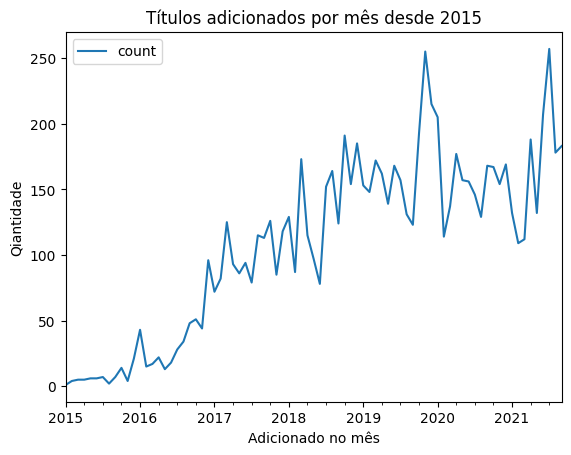

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])
df_ts = df[df['date_added']>='2015-01-01']
df_ts.index = df_ts['date_added']
dfg = df_ts.groupby(pd.Grouper(freq='M')).size().reset_index(name='count')

dfg.plot(x='date_added', y='count', kind='line')
plt.xlabel('Adicionado no mês')
plt.ylabel('Qiantidade')
plt.title('Títulos adicionados por mês desde 2015')
plt.show()
